<a href="https://colab.research.google.com/github/SangHeeRho/DataScience/blob/main/unit08_%EC%9D%B8%EA%B5%AC_%EA%B5%AC%EC%A1%B0%EB%A5%BC_%EB%8B%A4%EC%96%91%ED%95%9C_%ED%98%95%ED%83%9C%EB%A1%9C_%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한글 깨짐 방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


지역명을 입력받아서 연령별 인구수 데이터 시각화하기

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 파주


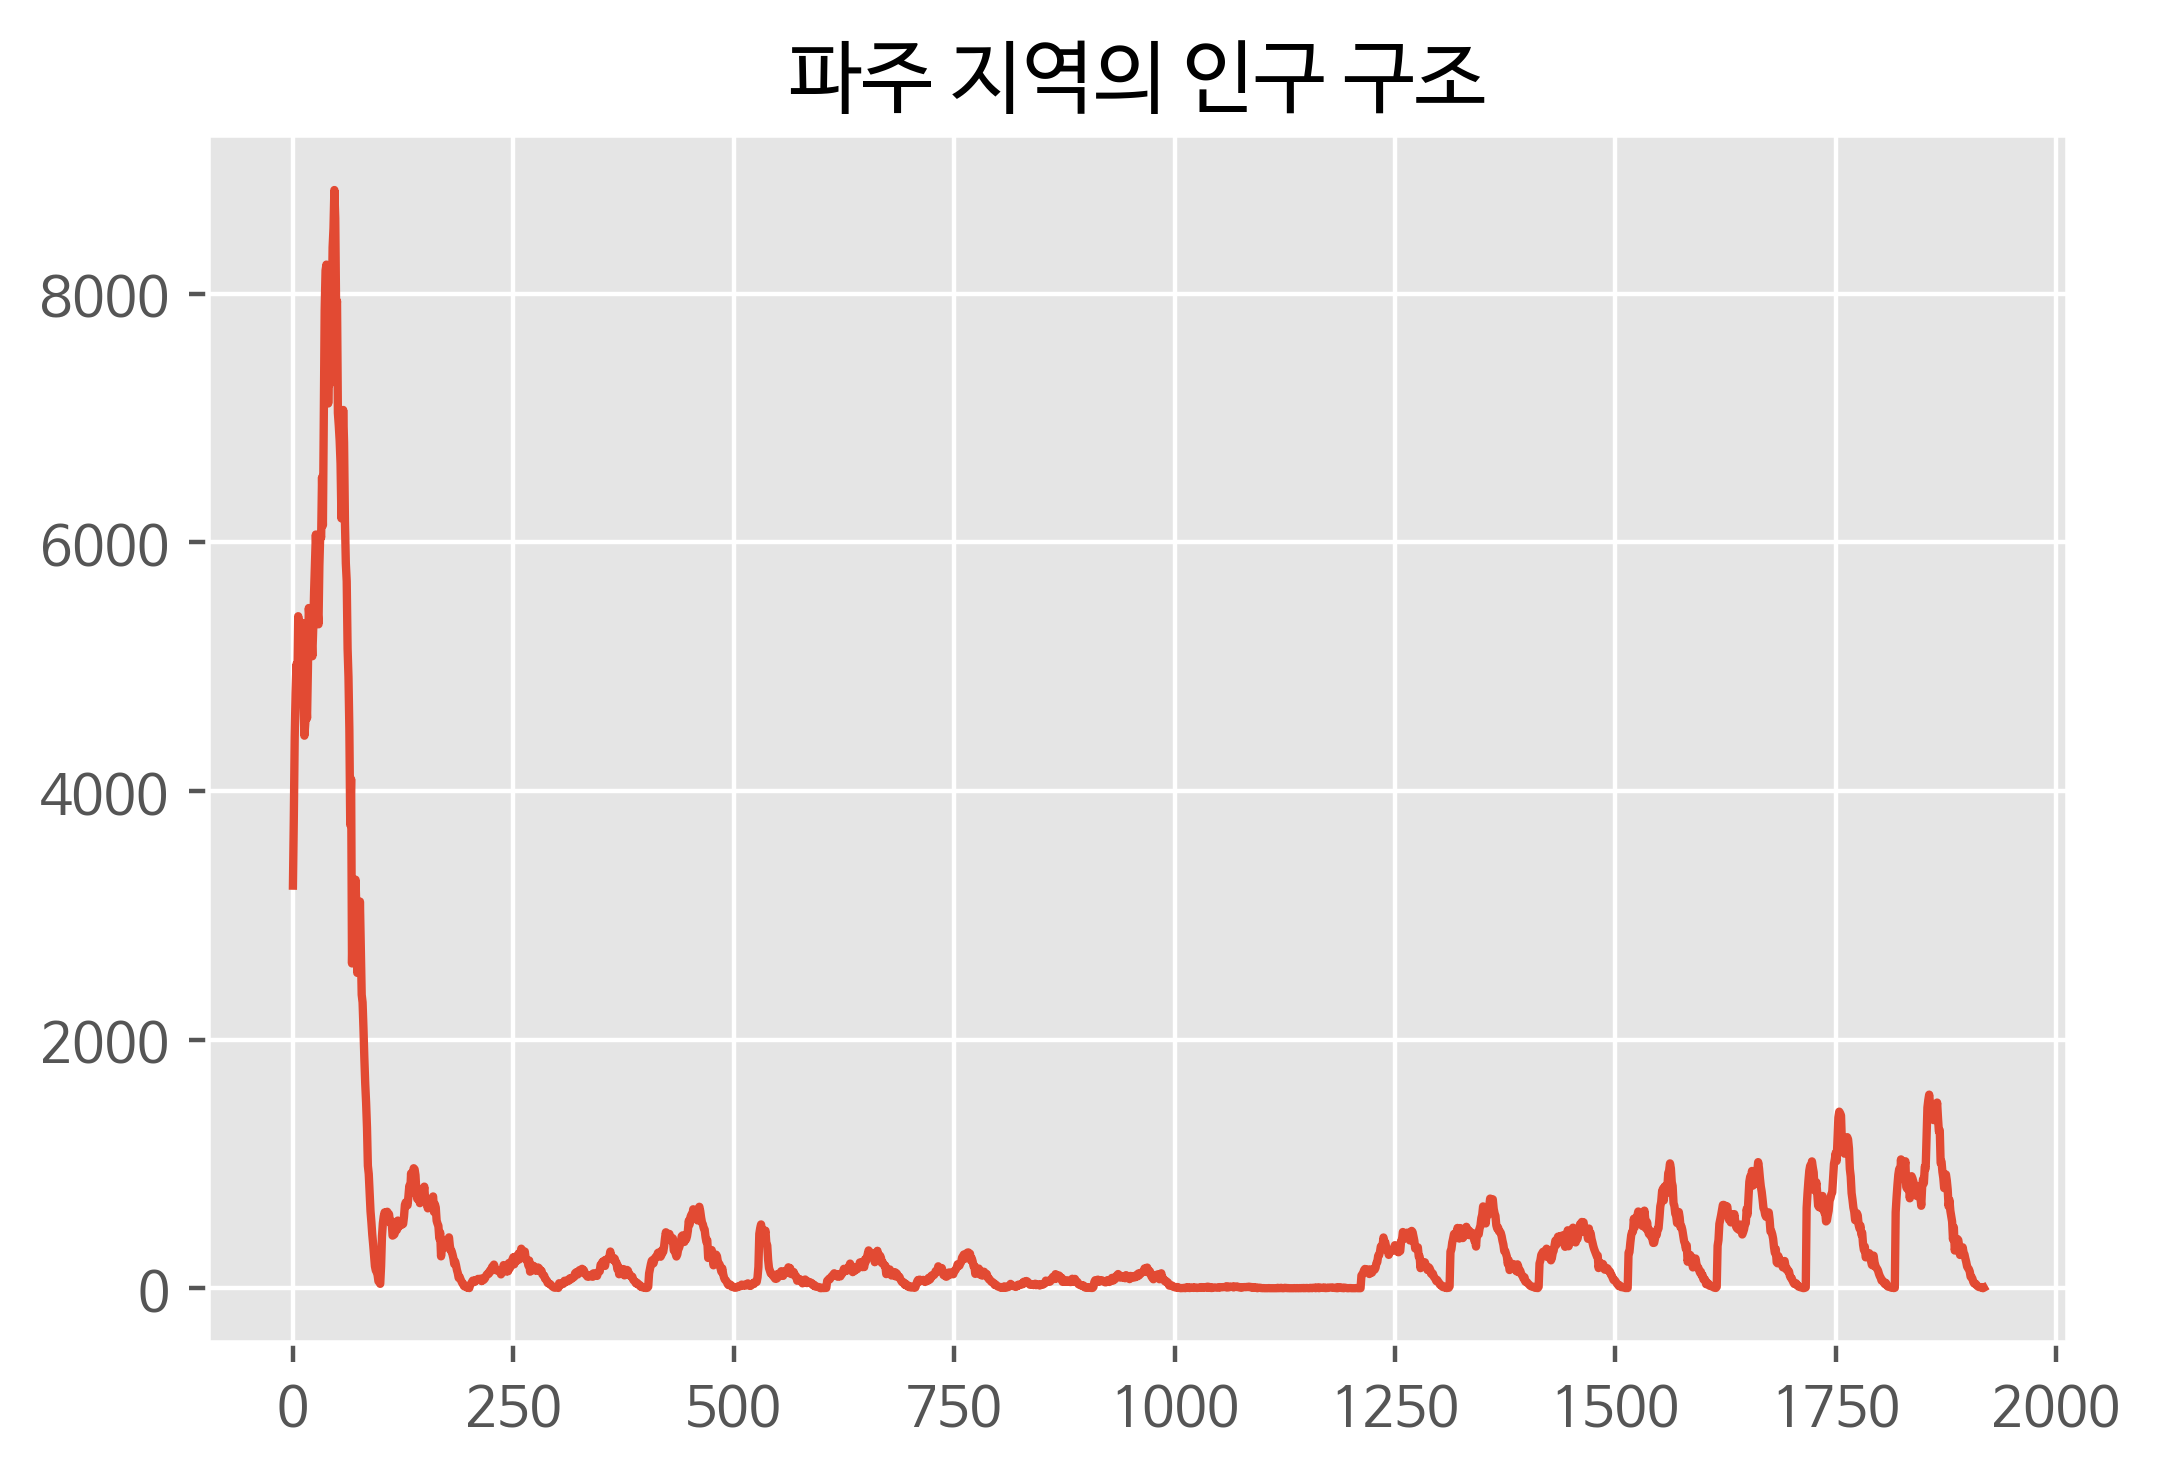

In [ ]:
import csv

f=open('age.csv',encoding='cp949')
data = csv.reader(f)

result=[]

#지역명을 입력받는 변수 선언
name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ")

for row in data:
  if name in row[0] :
    for i in row[3:]:
      result.append(int(i.replace(',',''))) #인구수 데이터 정수로 변환 후 result 변수에 담기

# 인구 구조 시각화
plt.figure(dpi = 200)
plt.style.use('ggplot')
plt.rc('font',family = 'NanumBarunGothic')

plt.title(name +' 지역의 인구 구조') #입력 받은 지역 이름 포함하여, 타이틀 속성 추가
plt.plot(result)
plt.show()

막대그래프 그리기 -> 비교 (지역별, 성별 기준 등)

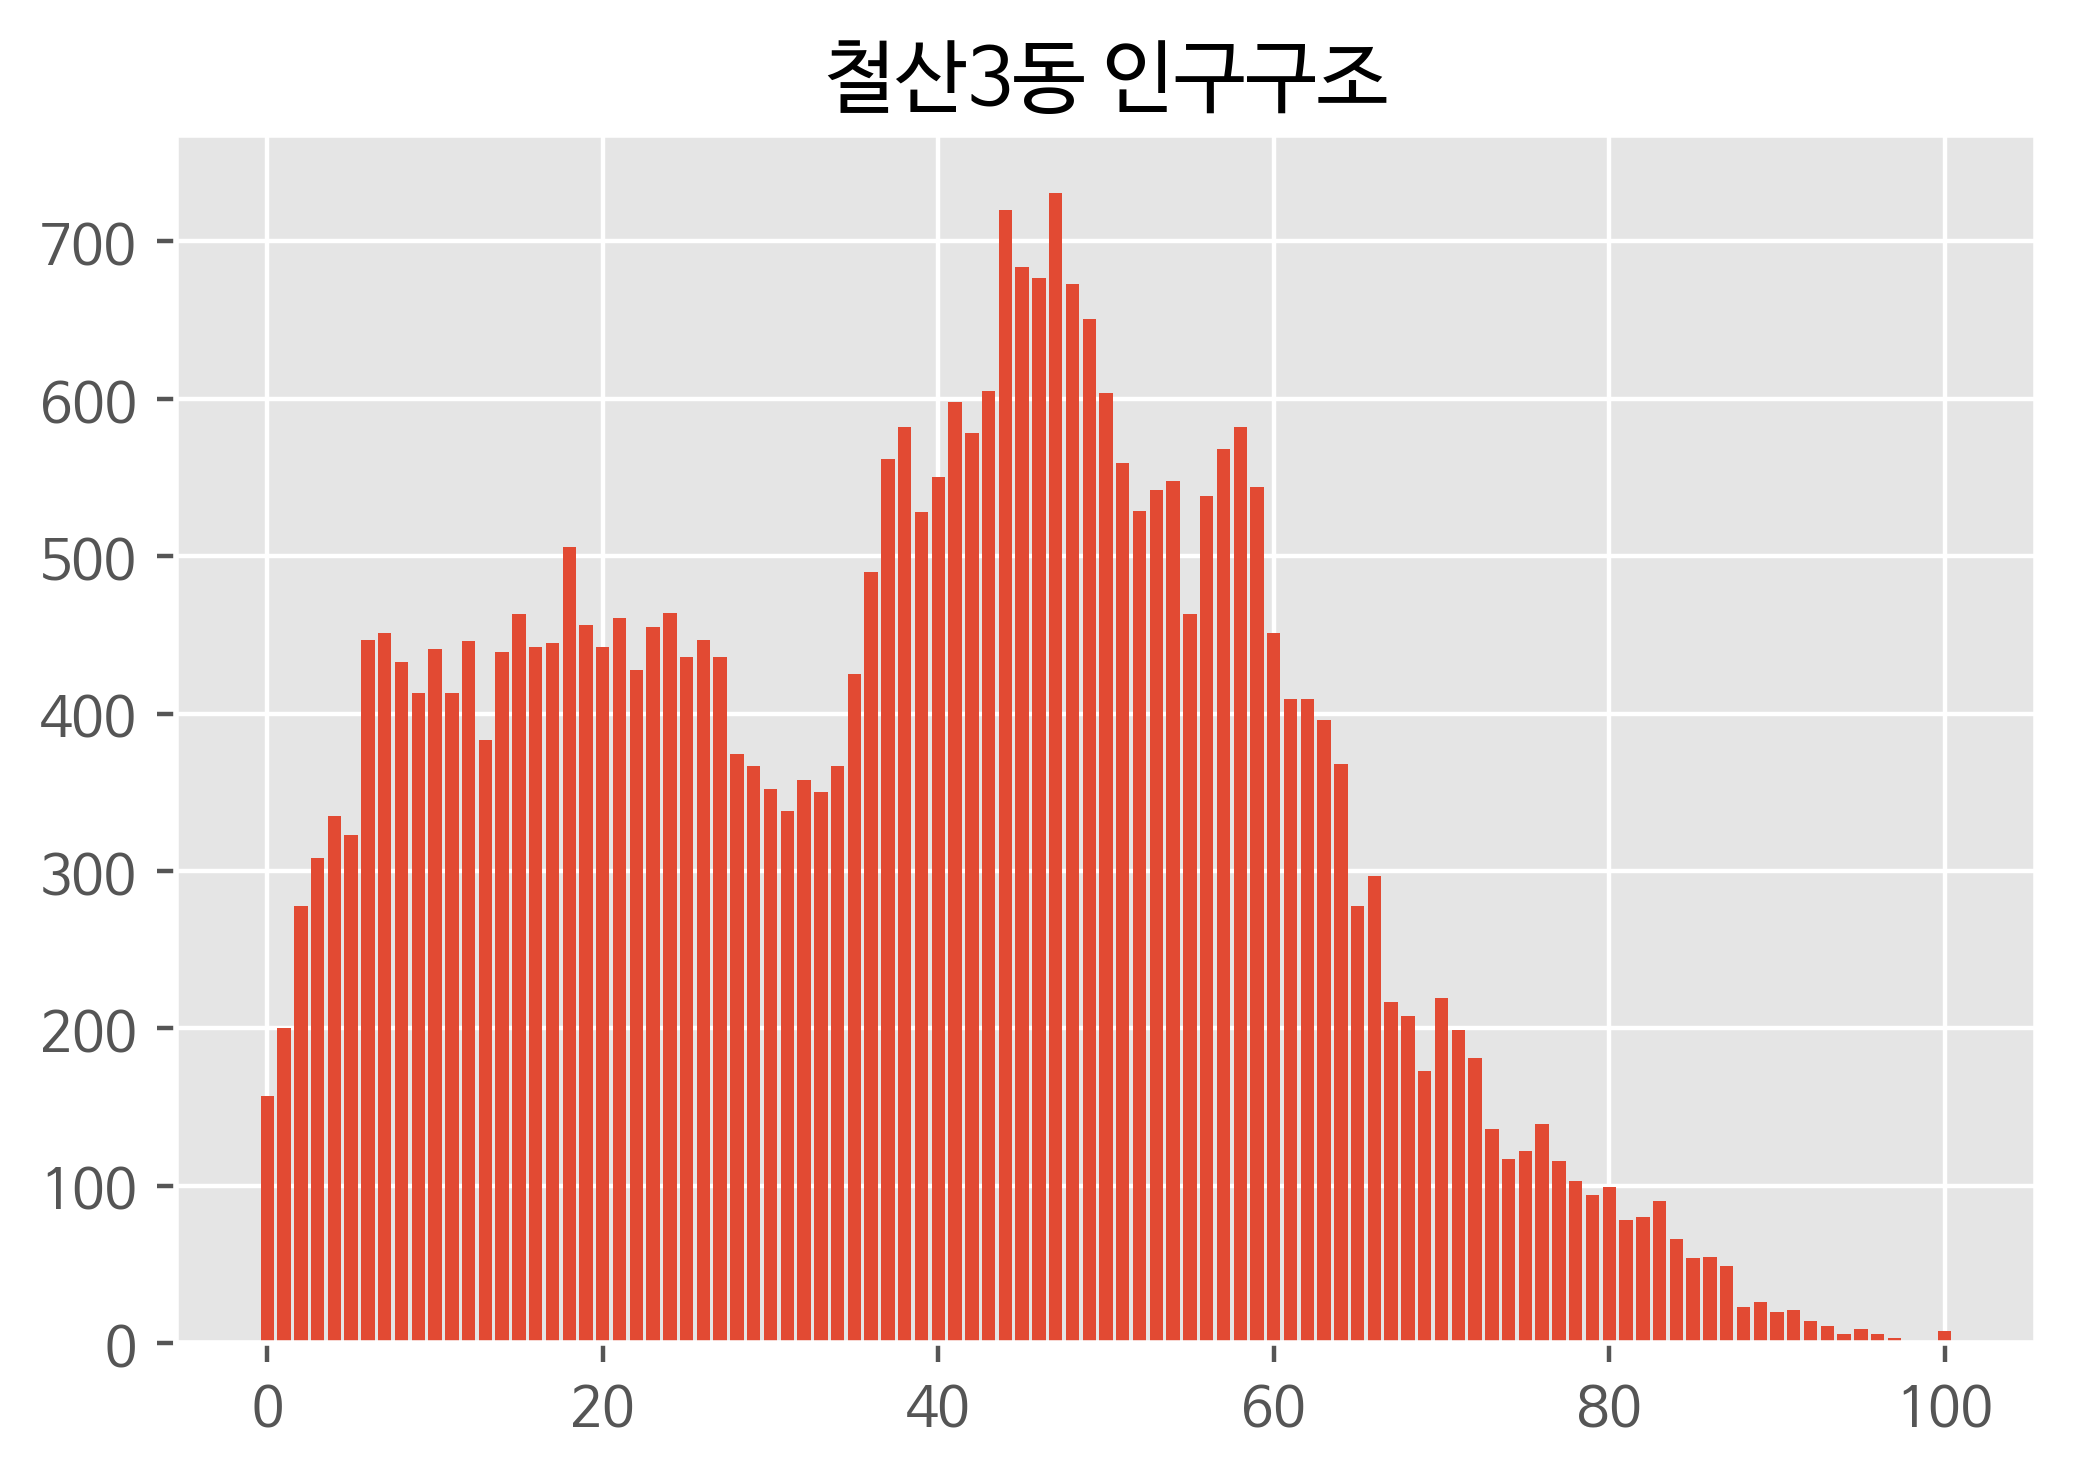

In [ ]:

import csv

f=open('age.csv',encoding='cp949')
data = csv.reader(f)

result=[]

for row in data:
  if '철산3동' in row[0] :
    for i in row[3:]:
      result.append(int(i)) #인구수 데이터 정수로 변환 후 result 변수에 담기

plt.figure(dpi = 200)
plt.bar(range(101),result)
plt.title('철산3동 인구구조')
plt.show()

수평 막대그래프(barh() 함수)를 활용해 우리 동네 인구 구조 시각화하기

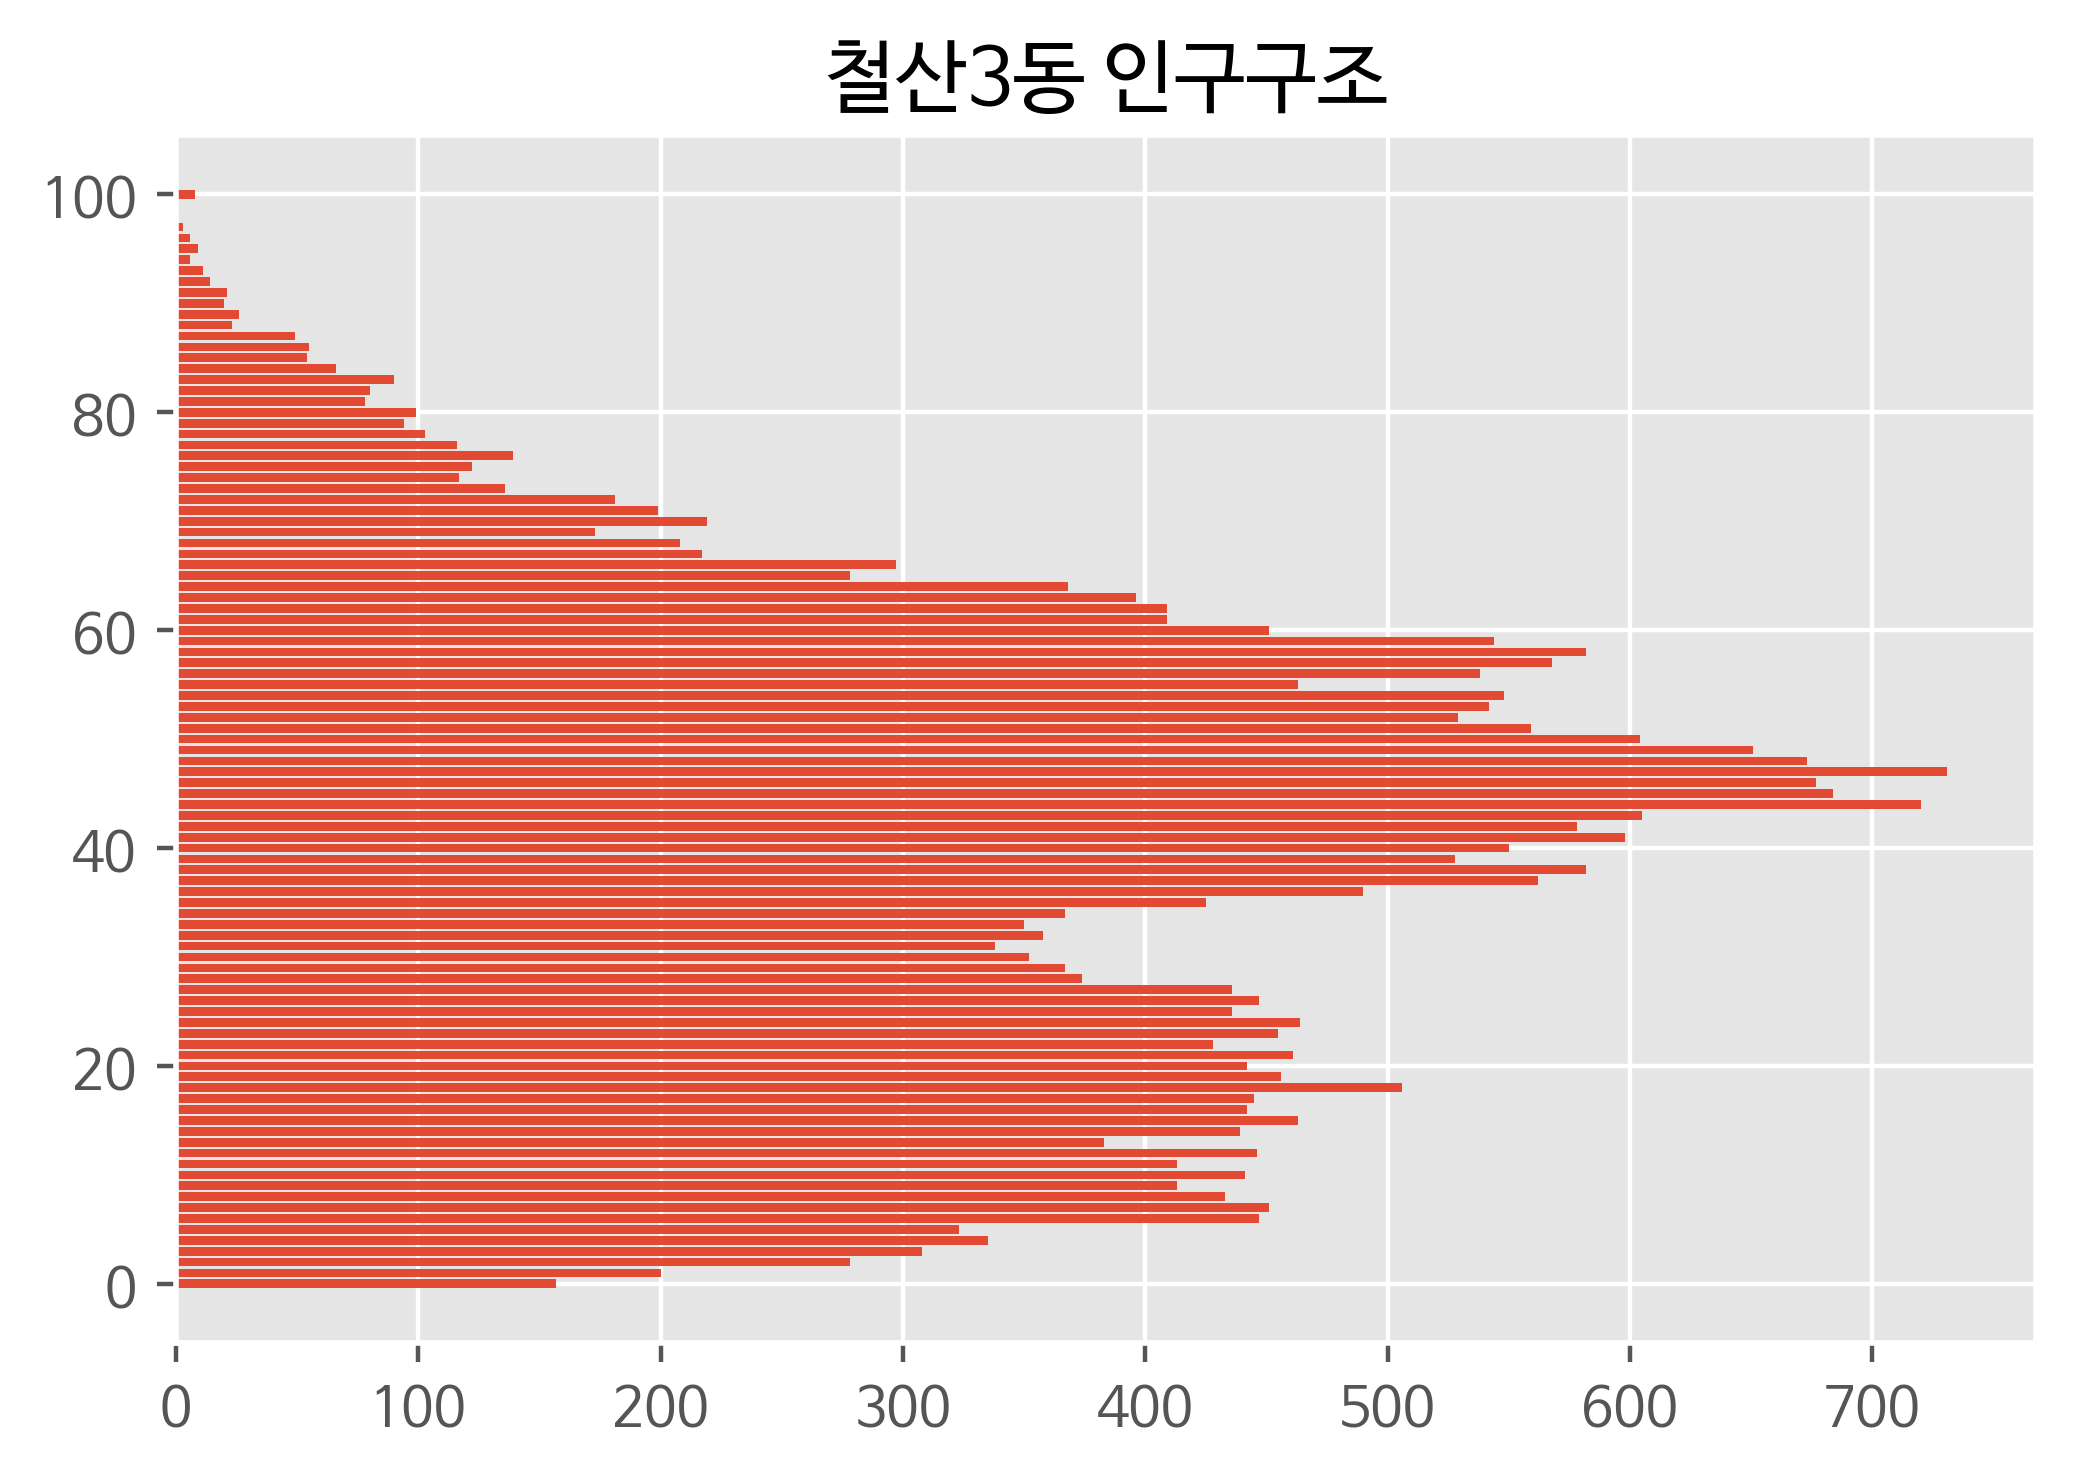

In [ ]:
import csv

f=open('age.csv',encoding='cp949')
data = csv.reader(f)

result=[]

for row in data:
  if '철산3동' in row[0] :
    for i in row[3:]:
      result.append(int(i)) #인구수 데이터 정수로 변환 후 result 변수에 담기

plt.figure(dpi = 200)
plt.barh(range(101),result)
plt.title('철산3동 인구구조')
plt.show()

각자 본인이 사는 동네로 그려보기 실습

항아리 모양 그래프 그리기

성별 데이터 저장하기(Type1)

In [ ]:
import csv
import matplotlib.pyplot as plt

f=open('gender.csv',encoding='cp949')
data=csv.reader(f)
m = []
f = []

for row in data:
  if '신도림' in row[0]:
    for i in range(0,101):
      m.append(int(row[i+3]))
      f.append(int(row[-(i+1)])) # -1 값부터 담음 -> 100세 이상 부터 값이 담김]

f.reverse() #0세 부터 인구수 나올 수 있도록 데이터 뒤집기

print(f)
f.reverse()
print(f)

[152, 164, 195, 195, 200, 206, 227, 222, 195, 198, 201, 190, 161, 174, 161, 178, 166, 163, 203, 193, 192, 220, 218, 256, 235, 216, 239, 255, 229, 268, 305, 296, 306, 318, 336, 369, 393, 441, 382, 396, 355, 357, 355, 321, 366, 351, 303, 327, 329, 299, 299, 246, 247, 294, 240, 222, 258, 307, 280, 268, 263, 238, 224, 269, 201, 185, 225, 140, 143, 120, 118, 143, 86, 85, 74, 84, 87, 69, 73, 67, 63, 53, 60, 46, 44, 31, 29, 29, 21, 25, 18, 12, 11, 10, 3, 7, 3, 2, 1, 3, 6]
[6, 3, 1, 2, 3, 7, 3, 10, 11, 12, 18, 25, 21, 29, 29, 31, 44, 46, 60, 53, 63, 67, 73, 69, 87, 84, 74, 85, 86, 143, 118, 120, 143, 140, 225, 185, 201, 269, 224, 238, 263, 268, 280, 307, 258, 222, 240, 294, 247, 246, 299, 299, 329, 327, 303, 351, 366, 321, 355, 357, 355, 396, 382, 441, 393, 369, 336, 318, 306, 296, 305, 268, 229, 255, 239, 216, 235, 256, 218, 220, 192, 193, 203, 163, 166, 178, 161, 174, 161, 190, 201, 198, 195, 222, 227, 206, 200, 195, 195, 164, 152]


성별 데이터 순서대로 저장하기(Type 2)

In [ ]:
import csv
f=open('gender.csv',encoding='cp949')
data=csv.reader(f)

m=[]
f=[]

for row in data :
  if '신도림' in row[0]:
    for i in row[3:104] :# 남성 데이터 :3 - 103번 데이터 슬라이싱 - 정수 데이터로 변환 - m 리스트에 저장
      m.append(int(i))
    for i in row[106:]: # 여성 데이터 :106번 - 끝까지 데이터 슬라이싱 - 정수 데이터로 변환 - f 리스트에 저장
      f.append(int(i))

print(m)
print(f)

[165, 185, 221, 209, 192, 209, 189, 210, 217, 197, 210, 198, 198, 189, 171, 156, 183, 178, 205, 175, 203, 218, 210, 257, 222, 249, 203, 239, 227, 212, 250, 237, 270, 309, 308, 387, 366, 367, 349, 390, 324, 330, 342, 306, 363, 348, 331, 321, 302, 275, 264, 253, 258, 266, 280, 224, 280, 257, 277, 246, 270, 217, 194, 248, 180, 193, 177, 130, 148, 159, 154, 141, 112, 77, 86, 70, 86, 69, 57, 47, 51, 44, 26, 32, 20, 9, 19, 13, 5, 6, 3, 3, 3, 2, 1, 3, 1, 1, 1, 0, 1]
[152, 164, 195, 195, 200, 206, 227, 222, 195, 198, 201, 190, 161, 174, 161, 178, 166, 163, 203, 193, 192, 220, 218, 256, 235, 216, 239, 255, 229, 268, 305, 296, 306, 318, 336, 369, 393, 441, 382, 396, 355, 357, 355, 321, 366, 351, 303, 327, 329, 299, 299, 246, 247, 294, 240, 222, 258, 307, 280, 268, 263, 238, 224, 269, 201, 185, 225, 140, 143, 120, 118, 143, 86, 85, 74, 84, 87, 69, 73, 67, 63, 53, 60, 46, 44, 31, 29, 29, 21, 25, 18, 12, 11, 10, 3, 7, 3, 2, 1, 3, 6]


항아리 그래프를 위해 남성 데이터 음수로 바꾸기

In [ ]:
import csv
f=open('gender.csv',encoding='cp949')
data=csv.reader(f)

m=[]
f=[]

for row in data :
  if '신도림' in row[0]:
    for i in row[3:104] :# 남성 데이터 :3 - 103번 데이터 슬라이싱 - 정수 데이터로 변환 - m 리스트에 저장
      m.append(-int(i))
    for i in row[106:]: # 여성 데이터 :106번 - 끝까지 데이터 슬라이싱 - 정수 데이터로 변환 - f 리스트에 저장
      f.append(int(i))

print(m)
print(f)

[-165, -185, -221, -209, -192, -209, -189, -210, -217, -197, -210, -198, -198, -189, -171, -156, -183, -178, -205, -175, -203, -218, -210, -257, -222, -249, -203, -239, -227, -212, -250, -237, -270, -309, -308, -387, -366, -367, -349, -390, -324, -330, -342, -306, -363, -348, -331, -321, -302, -275, -264, -253, -258, -266, -280, -224, -280, -257, -277, -246, -270, -217, -194, -248, -180, -193, -177, -130, -148, -159, -154, -141, -112, -77, -86, -70, -86, -69, -57, -47, -51, -44, -26, -32, -20, -9, -19, -13, -5, -6, -3, -3, -3, -2, -1, -3, -1, -1, -1, 0, -1]
[152, 164, 195, 195, 200, 206, 227, 222, 195, 198, 201, 190, 161, 174, 161, 178, 166, 163, 203, 193, 192, 220, 218, 256, 235, 216, 239, 255, 229, 268, 305, 296, 306, 318, 336, 369, 393, 441, 382, 396, 355, 357, 355, 321, 366, 351, 303, 327, 329, 299, 299, 246, 247, 294, 240, 222, 258, 307, 280, 268, 263, 238, 224, 269, 201, 185, 225, 140, 143, 120, 118, 143, 86, 85, 74, 84, 87, 69, 73, 67, 63, 53, 60, 46, 44, 31, 29, 29, 21, 25, 18,

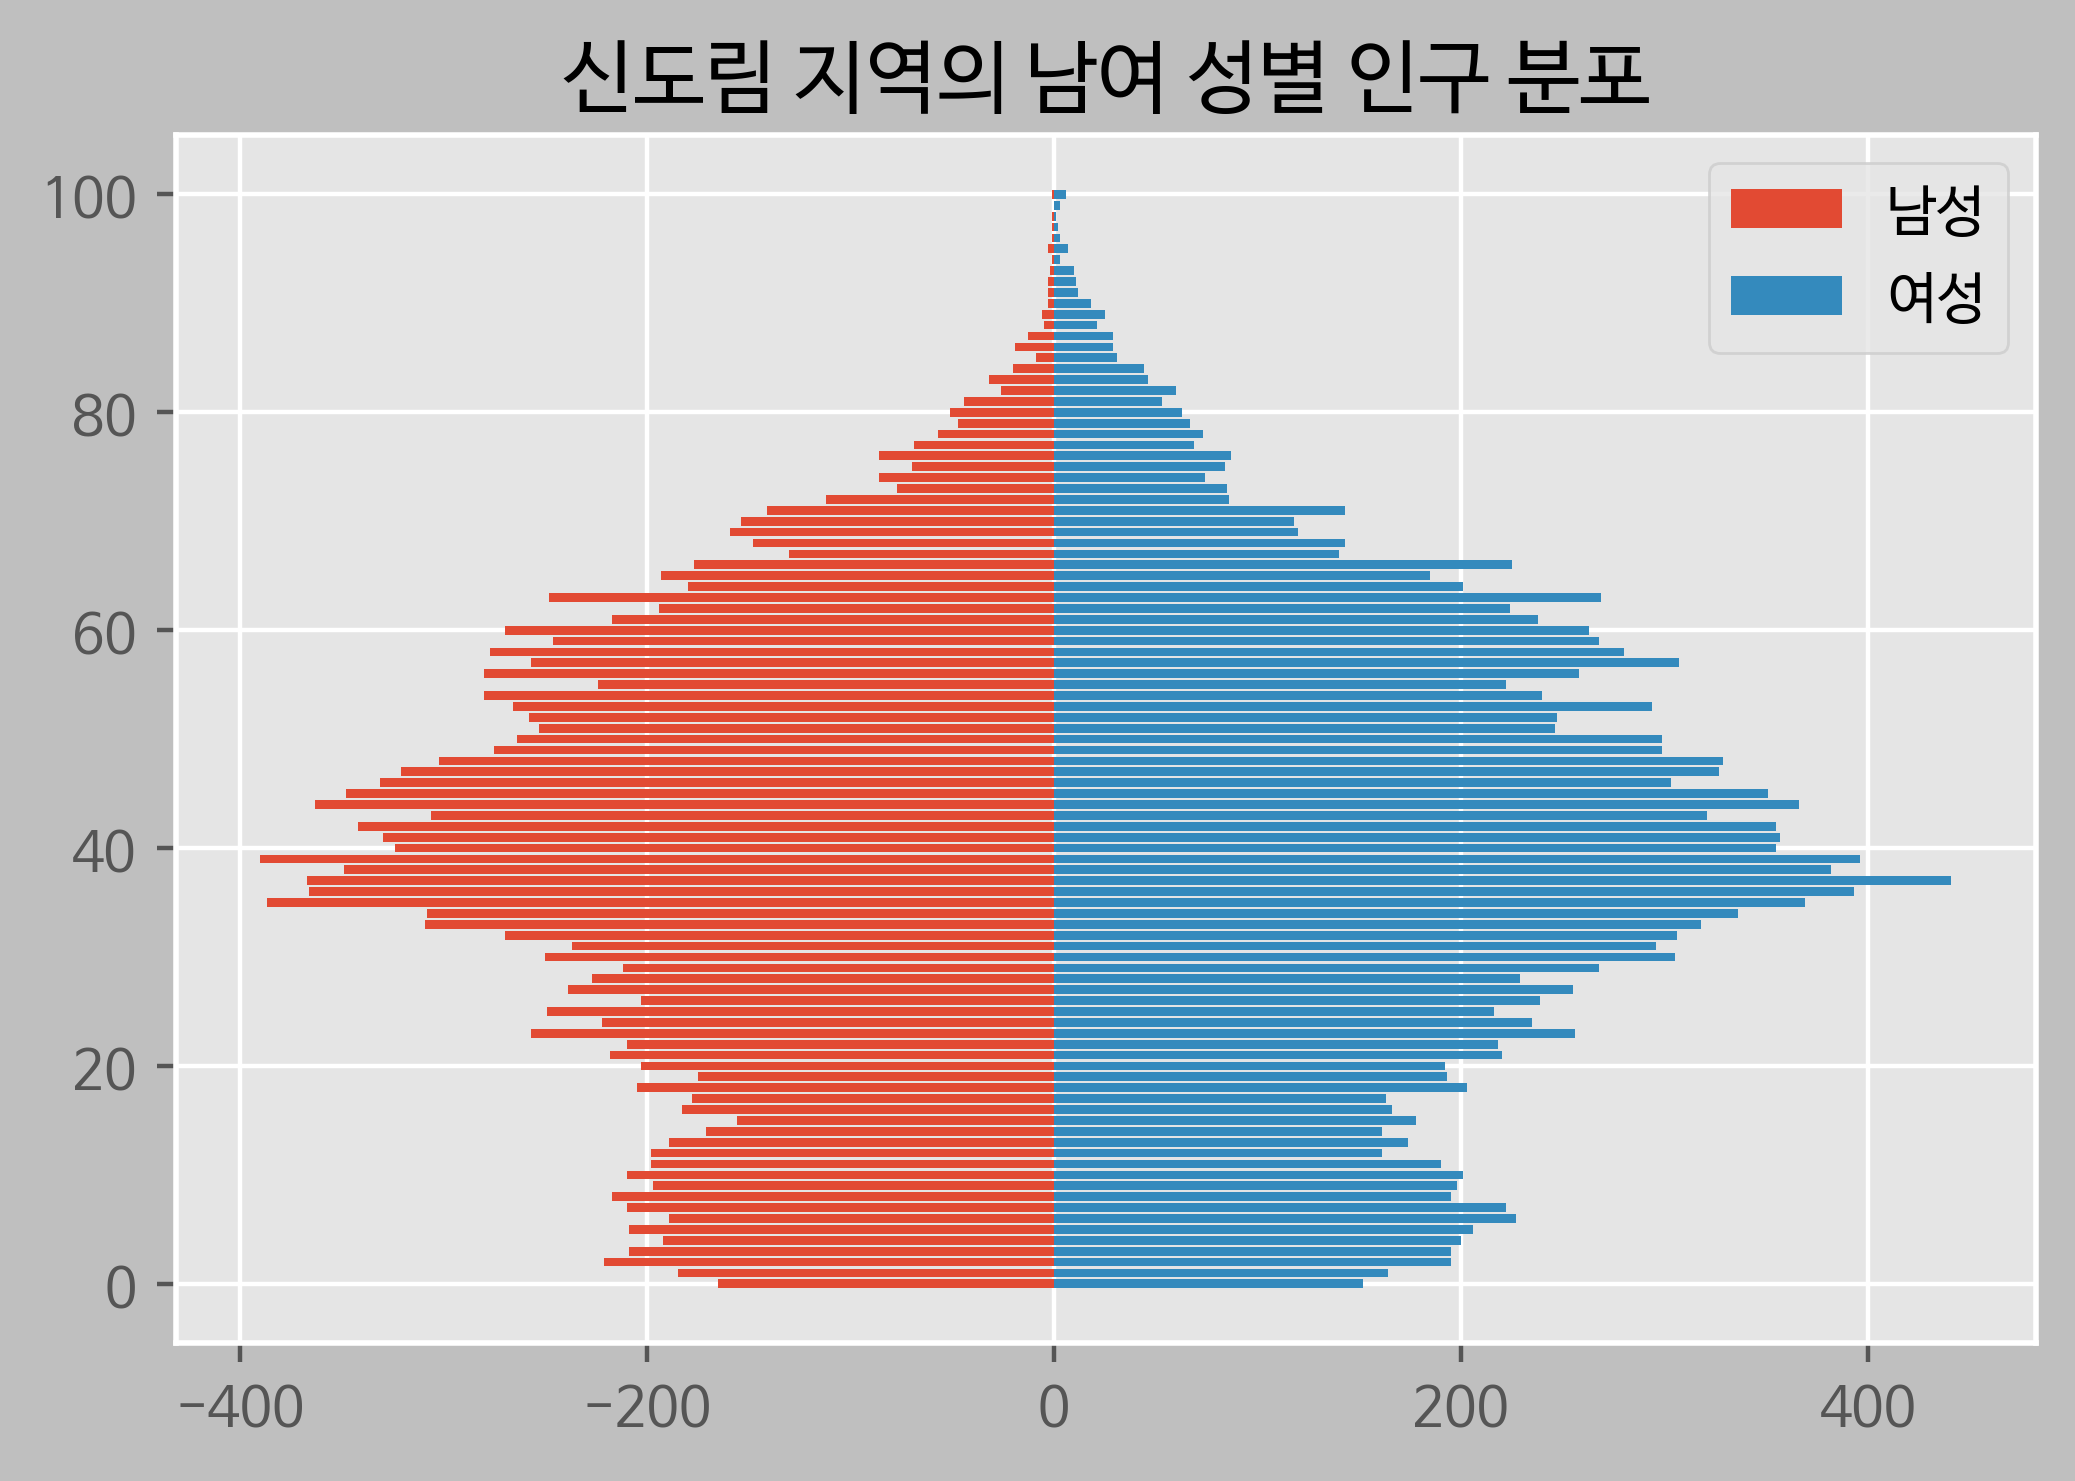

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.style.use('ggplot')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False
plt.title("신도림 지역의 남여 성별 인구 분포")
plt.barh(range(101),m,label='남성')
plt.barh(range(101),f,label='여성')
plt.legend()
plt.show()

개인 데이터를 조별로 취합 <br>
1) 성별 데이터 수평 막대 그래프로 시각화 (항아리 그래프) -> 본인 동네의 데이터
<br>
2) 2019년 2월 연령별 인구 구조 -> 2020년 2월 연령별 인구 구조 비교 (같이 그리기)

총 슬라이스 4장

In [ ]:
import csv
f=open('2011_paju.csv',encoding='cp949')
data=csv.reader(f)

m=[]
f=[]

for row in data :
  if '경기도 파주시 (4148000000)' in row[0]:
    for i in row[3:104]: # 남성 데이터 :3 - 103번 데이터 슬라이싱 - 정수 데이터로 변환 - m 리스트에 저장
      m.append(-int(i.replace(',','')))
    for i in row[106:]: # 여성 데이터 :106번 - 끝까지 데이터 슬라이싱 - 정수 데이터로 변환 - f 리스트에 저장
      f.append(int(i.replace(',','')))

print(m)
print(f)

[-1976, -2040, -2190, -2327, -2097, -2044, -2161, -2175, -2188, -2384, -2596, -2601, -2500, -2439, -2396, -2425, -2365, -2304, -2260, -2173, -1934, -1954, -2210, -2441, -2787, -2957, -2645, -2887, -3180, -3378, -3178, -3041, -2714, -2960, -2875, -2996, -3202, -3550, -3762, -3992, -4075, -3705, -3762, -3223, -3378, -3204, -3201, -2946, -3131, -3314, -3180, -2805, -2771, -2597, -2313, -2245, -1984, -1635, -1855, -1132, -1278, -1384, -1366, -1441, -1345, -1080, -1110, -1073, -1372, -1207, -1118, -1112, -980, -907, -911, -807, -729, -541, -489, -431, -420, -334, -247, -201, -174, -119, -137, -133, -136, -92, -74, -48, -30, -21, -23, -18, -14, -5, -4, -8, -27]
[1929, 1868, 2049, 2248, 2035, 1938, 1932, 2045, 1942, 2131, 2423, 2423, 2283, 2324, 2238, 2143, 2053, 2065, 2428, 2524, 2177, 1899, 2031, 2097, 1895, 1962, 1968, 2120, 2460, 2726, 2784, 2864, 2641, 2905, 2837, 2968, 3324, 3535, 3575, 3662, 3633, 3267, 3238, 2918, 2790, 2761, 2770, 2497, 2723, 2828, 2819, 2544, 2364, 2445, 2225, 2163,

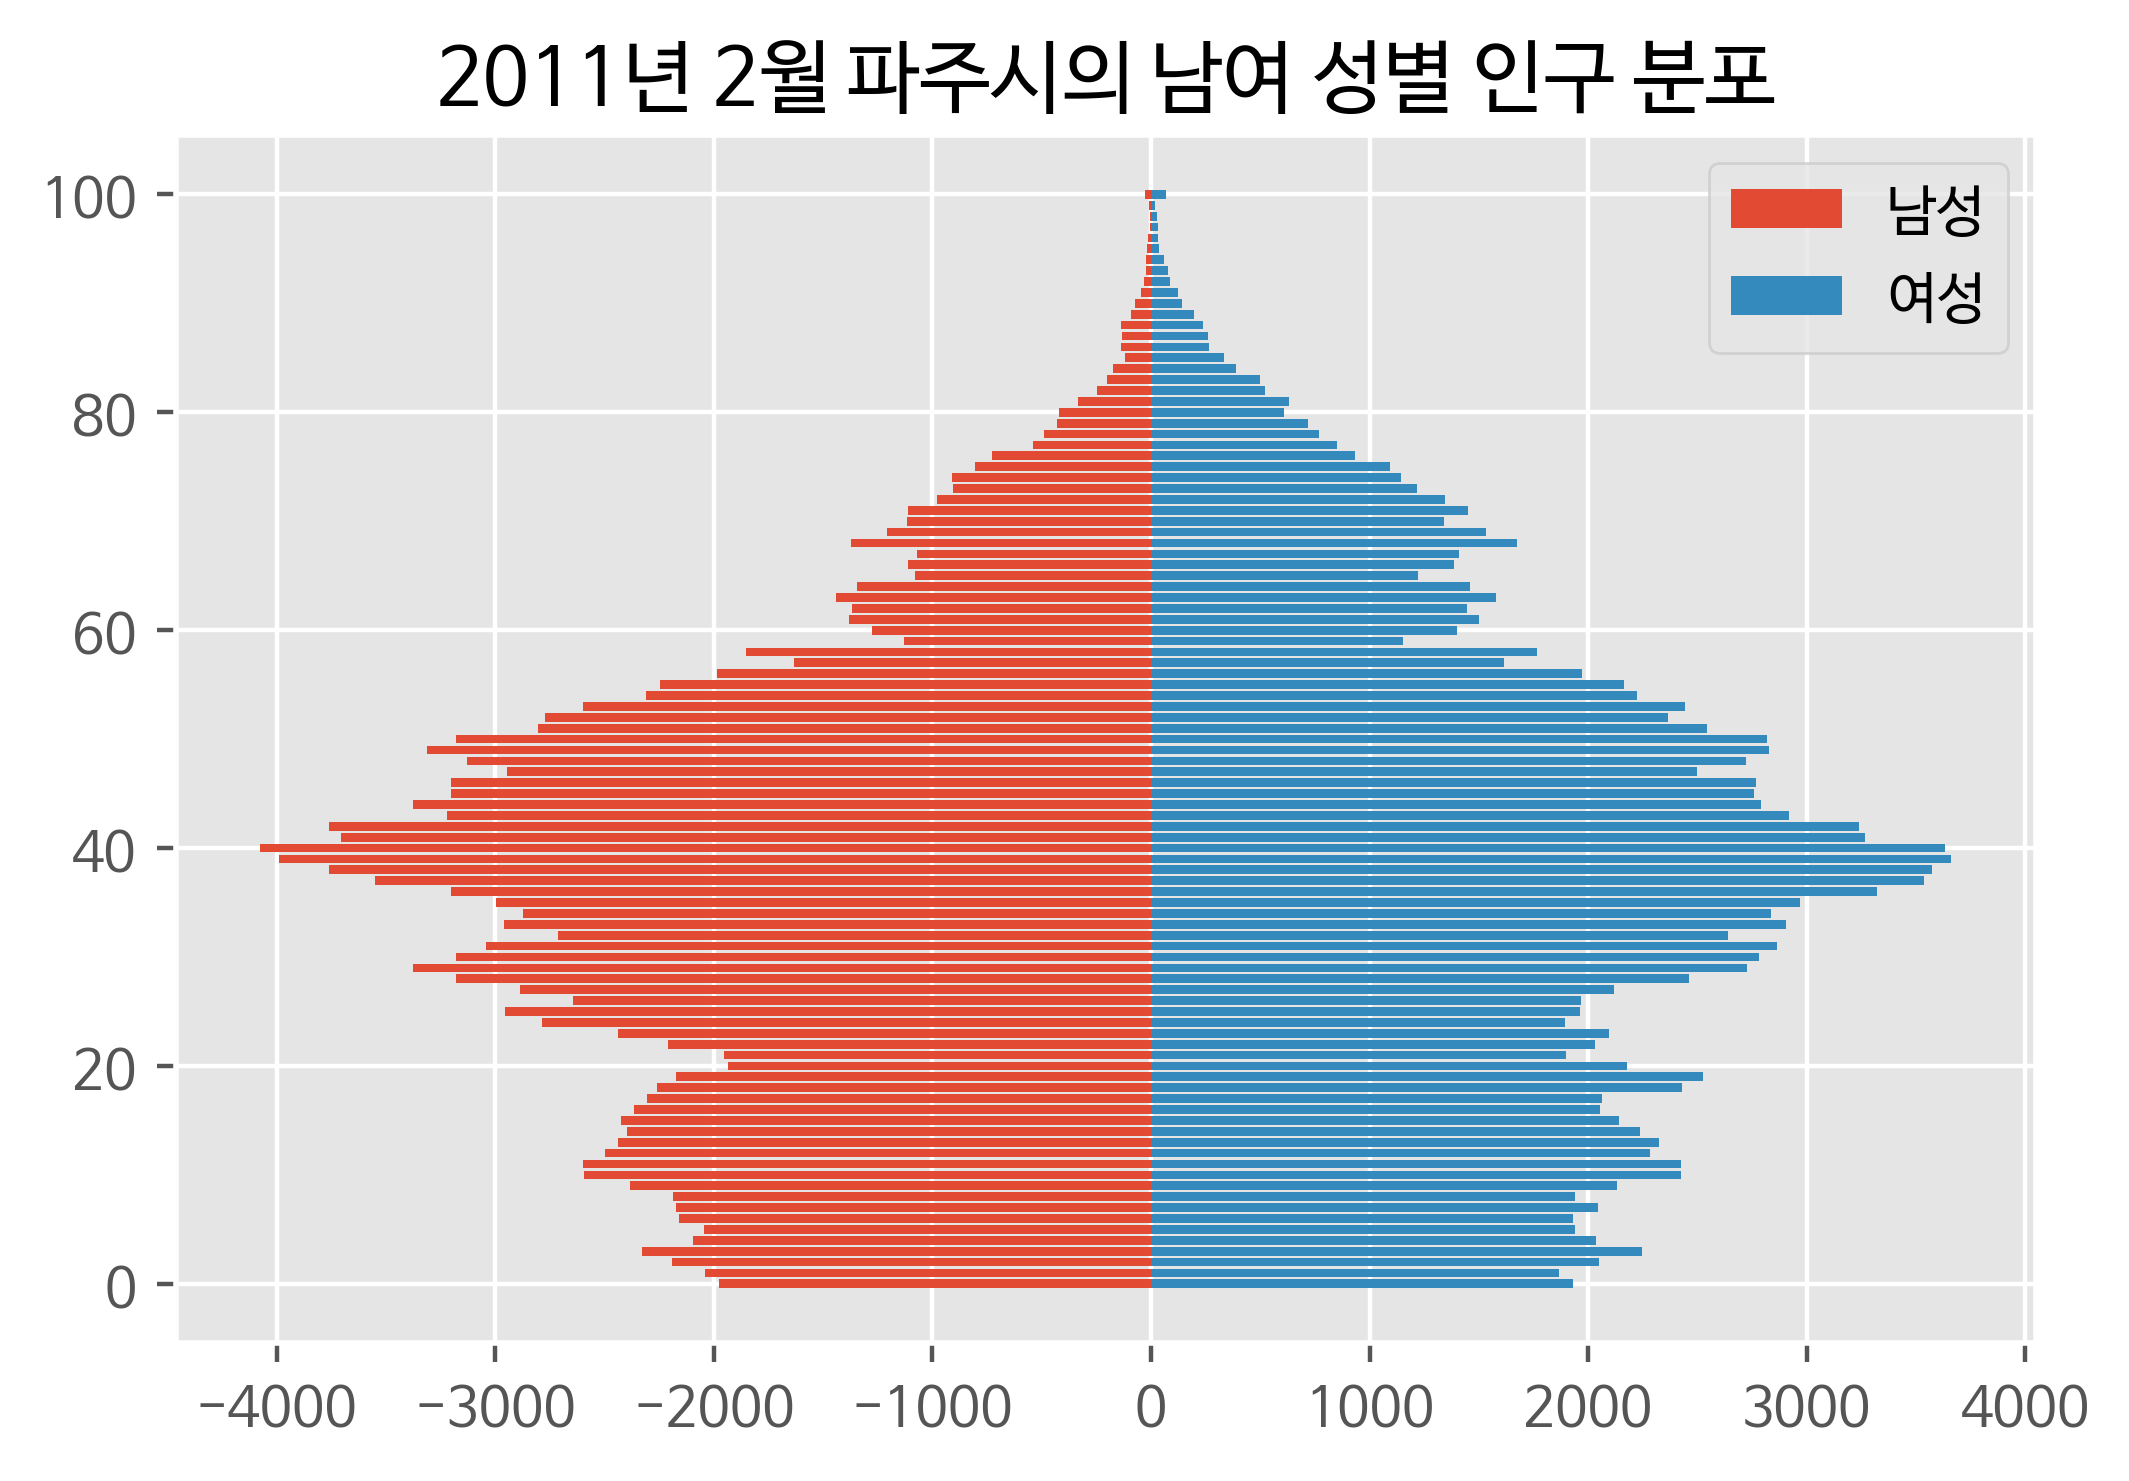

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)
plt.style.use('ggplot')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False
plt.title("2011년 2월 파주시의 남여 성별 인구 분포")
plt.barh(range(101),m,label='남성')
plt.barh(range(101),f,label='여성')
plt.legend()
plt.show()

In [ ]:
import csv
f=open('2021_paju.csv',encoding='cp949')
data=csv.reader(f)

m1=[]
f1=[]

for row in data :
  if '경기도 파주시 (4148000000)' in row[0]:
    for i in row[3:104]: # 남성 데이터 :3 - 103번 데이터 슬라이싱 - 정수 데이터로 변환 - m 리스트에 저장
      m1.append(-int(i.replace(',','')))
    for i in row[106:]: # 여성 데이터 :106번 - 끝까지 데이터 슬라이싱 - 정수 데이터로 변환 - f 리스트에 저장
      f1.append(int(i.replace(',','')))

print(m1)
print(f1)

[-1331, -1731, -1935, -2014, -2347, -2508, -2579, -2497, -2851, -2661, -2728, -2503, -2675, -2760, -2381, -2313, -2389, -2504, -2441, -2643, -2908, -2899, -2855, -2834, -2913, -3049, -3195, -3148, -3193, -3197, -2792, -3028, -3185, -3326, -3369, -3670, -3385, -3766, -4299, -4498, -4385, -4280, -3698, -3840, -3783, -3892, -4043, -4350, -4568, -4718, -4644, -4188, -4370, -3734, -3810, -3647, -3515, -3286, -3602, -3769, -3545, -3201, -3072, -2922, -2572, -2467, -2226, -1898, -1978, -1219, -1368, -1457, -1437, -1484, -1362, -1106, -1068, -1015, -1348, -1052, -900, -836, -746, -654, -573, -479, -414, -272, -243, -177, -160, -121, -80, -59, -34, -23, -17, -22, -23, -6, -60]
[1320, 1623, 1717, 1974, 2256, 2429, 2535, 2400, 2708, 2563, 2717, 2368, 2463, 2675, 2348, 2228, 2189, 2361, 2217, 2362, 2633, 2569, 2426, 2557, 2464, 2546, 2651, 2956, 3033, 2985, 2846, 2488, 2802, 2945, 2798, 3080, 3046, 3518, 3912, 4039, 4067, 4005, 3605, 3831, 3664, 3776, 3974, 4205, 4141, 4286, 4194, 3856, 3859, 3440

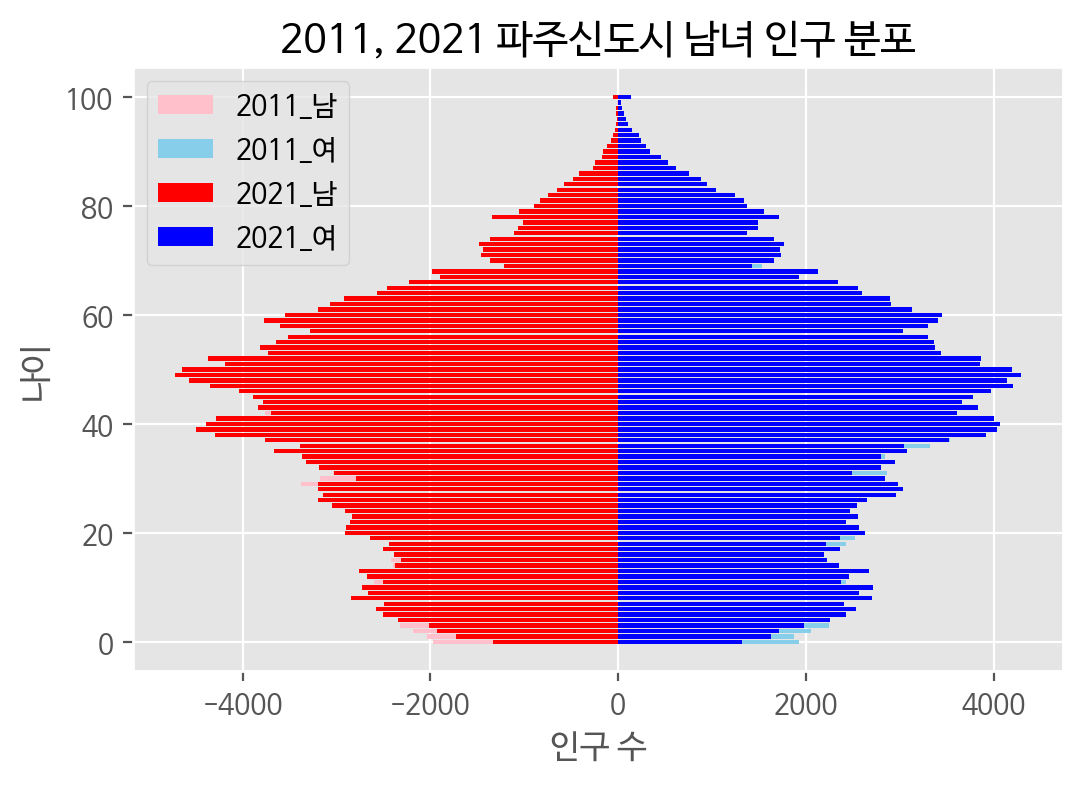

In [ ]:
import csv
f=open('2021_paju.csv',encoding='cp949')
data=csv.reader(f)

m1=[]
f1=[]

for row in data :
  if '경기도 파주시 (4148000000)' in row[0]:
    for i in row[3:104]: # 남성 데이터 :3 - 103번 데이터 슬라이싱 - 정수 데이터로 변환 - m 리스트에 저장
      m1.append(-int(i.replace(',','')))
    for i in row[106:]: # 여성 데이터 :106번 - 끝까지 데이터 슬라이싱 - 정수 데이터로 변환 - f 리스트에 저장
      f1.append(int(i.replace(',','')))

import csv
f=open('2011_paju.csv',encoding='cp949')
data=csv.reader(f)

m=[]
f=[]

for row in data :
  if '경기도 파주시 (4148000000)' in row[0]:
    for i in row[3:104]: # 남성 데이터 :3 - 103번 데이터 슬라이싱 - 정수 데이터로 변환 - m 리스트에 저장
      m.append(-int(i.replace(',','')))
    for i in row[106:]: # 여성 데이터 :106번 - 끝까지 데이터 슬라이싱 - 정수 데이터로 변환 - f 리스트에 저장
      f.append(int(i.replace(',','')))


import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.style.use('ggplot')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False
plt.title("2011, 2021 파주신도시 남녀 인구 분포")
plt.barh(range(101),m, color='pink', label='2011_남')
plt.barh(range(101),f, color='skyblue', label='2011_여')
plt.barh(range(101),m1, color='r', label='2021_남')
plt.barh(range(101),f1, color='b',label='2021_여')
plt.xlabel('인구 수')
plt.ylabel('나이')
plt.legend(loc='upper left')
plt.show()

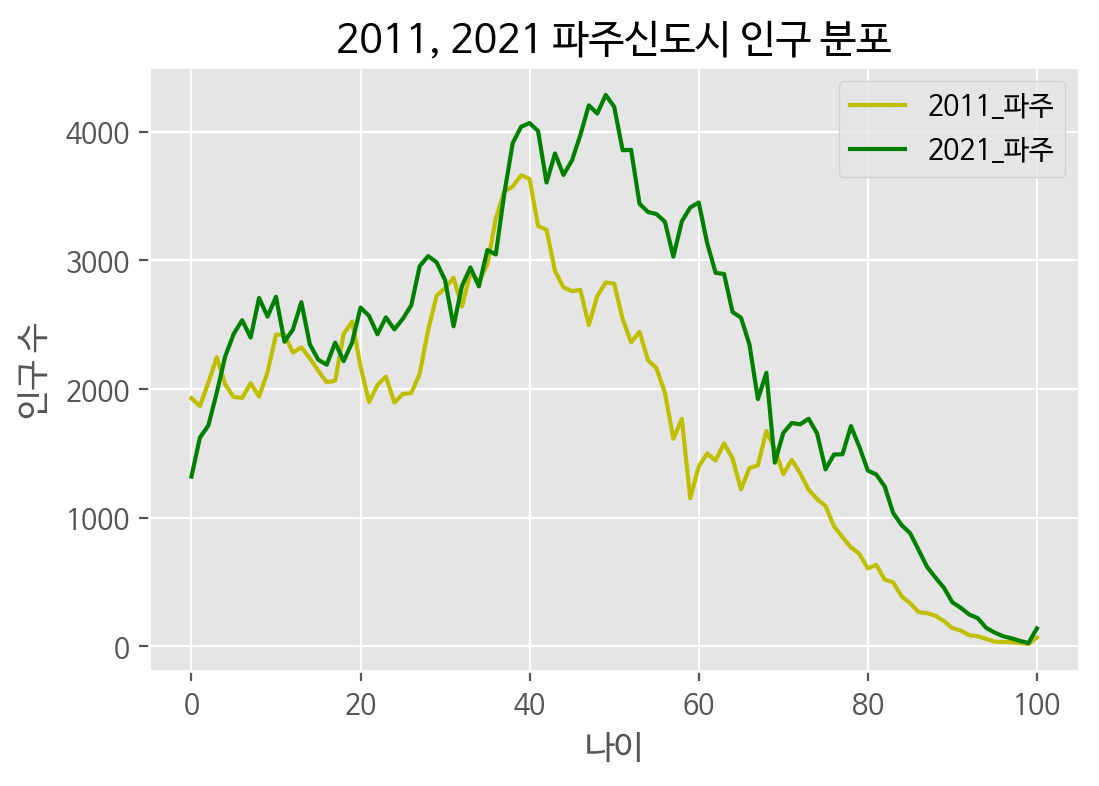

In [ ]:
import csv
f=open('2021_paju.csv',encoding='cp949')
data=csv.reader(f)

m1=[]
f1=[]

for row in data :
  if '경기도 파주시 (4148000000)' in row[0]:
    for i in row[3:104]: # 남성 데이터 :3 - 103번 데이터 슬라이싱 - 정수 데이터로 변환 - m 리스트에 저장
      m1.append(-int(i.replace(',','')))
    for i in row[106:]: # 여성 데이터 :106번 - 끝까지 데이터 슬라이싱 - 정수 데이터로 변환 - f 리스트에 저장
      f1.append(int(i.replace(',','')))

import csv
f=open('2011_paju.csv',encoding='cp949')
data=csv.reader(f)

m=[]
f=[]

for row in data :
  if '경기도 파주시 (4148000000)' in row[0]:
    for i in row[3:104]: # 남성 데이터 :3 - 103번 데이터 슬라이싱 - 정수 데이터로 변환 - m 리스트에 저장
      m.append(-int(i.replace(',','')))
    for i in row[106:]: # 여성 데이터 :106번 - 끝까지 데이터 슬라이싱 - 정수 데이터로 변환 - f 리스트에 저장
      f.append(int(i.replace(',','')))


import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.style.use('ggplot')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False
plt.title("2011, 2021 파주신도시 인구 분포")
plt.plot(m*(-1)+f, color='y', label='2011_파주')
plt.plot(m1*(-1)+f1, color='g', label='2021_파주')
plt.xlabel('나이')
plt.ylabel('인구 수')
plt.legend(loc='upper right')
plt.show()

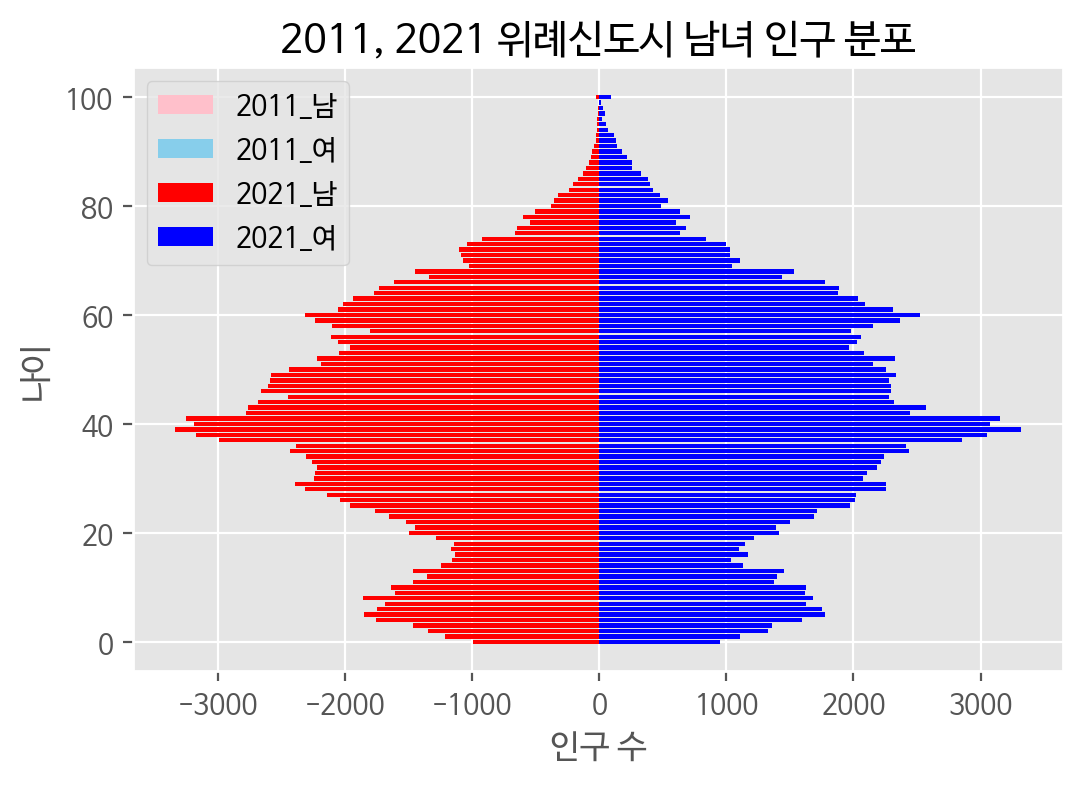

In [ ]:
import csv
f=open('2021_paju.csv',encoding='cp949')
data=csv.reader(f)

m1=[]
f1=[]

for row in data :
  if '경기도 하남시 (4145000000)' in row[0]:
    for i in row[3:104]: # 남성 데이터 :3 - 103번 데이터 슬라이싱 - 정수 데이터로 변환 - m 리스트에 저장
      m1.append(-int(i.replace(',','')))
    for i in row[106:]: # 여성 데이터 :106번 - 끝까지 데이터 슬라이싱 - 정수 데이터로 변환 - f 리스트에 저장
      f1.append(int(i.replace(',','')))

import csv
f=open('2011_paju.csv',encoding='cp949')
data=csv.reader(f)

m=[]
f=[]

for row in data :
  if '경기도 하남시 (4145000000)' in row[0]:
    for i in row[3:104]: # 남성 데이터 :3 - 103번 데이터 슬라이싱 - 정수 데이터로 변환 - m 리스트에 저장
      m.append(-int(i.replace(',','')))
    for i in row[106:]: # 여성 데이터 :106번 - 끝까지 데이터 슬라이싱 - 정수 데이터로 변환 - f 리스트에 저장
      f.append(int(i.replace(',','')))


import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.style.use('ggplot')
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False
plt.title("2011, 2021 위례신도시 남녀 인구 분포")
plt.barh(range(101),m, color='pink', label='2011_남')
plt.barh(range(101),f, color='skyblue', label='2011_여')
plt.barh(range(101),m1, color='r', label='2021_남')
plt.barh(range(101),f1, color='b',label='2021_여')
plt.xlabel('인구 수')
plt.ylabel('나이')
plt.legend(loc='upper left')
plt.show()